# Matplotlib
- Visualization can be a part of data exploration
- For example- we can identify outliers or if we need data trandformation
- It is helpful to generate ideas
- We will mainly focus on Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [4]:
# %matplotlib notebook  #for interactive plot
# %matplotlib inline    #enables the drawing of matplotlib fugures

In [4]:
data=np.arange(10)
data


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

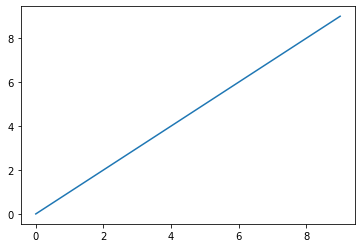

In [5]:
plt.plot(data)

## Figures
- Plots in matplotlib reside within a Figure object
- We can create a new figure with plt.figure

In [9]:
# Creating figure
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

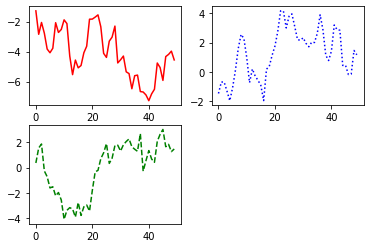

In [14]:
#Adding sub-plots
#plot: 折線圖
fig=plt.figure()
ax1=fig.add_subplot(2, 2, 1) #2 rows, 2 columns, 1st subplot
plt.plot(np.random.randn(50).cumsum(), 'r-') # - 實線
ax2=fig.add_subplot(2, 2, 2) #2 rows, 2 columns, 2nd subplot
plt.plot(np.random.randn(50).cumsum(), 'b:') # : 點線
ax3=fig.add_subplot(2, 2, 3) #2 rows, 2 columns, 3rd subplot
plt.plot(np.random.randn(50).cumsum(), 'g--') 
#g=green, -- is line style 虛線, cumsum(): 累加(https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)
#plt.plot繪製np.random.randn(50).cumsum()的圖 ??為什麼plt.plot顯現在ax3
#基本圖形使用介紹: https://ithelp.ithome.com.tw/articles/10234172、 https://blog.csdn.net/sinat_36219858/article/details/79800460

- The 'k--' is a style option instructing matplotlib to plot a black dashed line

**- Data visualization after additional plots**

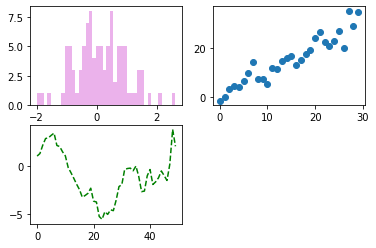

In [3]:
fig=plt.figure(facecolor='white') #create figure
ax1=fig.add_subplot(2, 2, 1)
ax2=fig.add_subplot(2, 2, 2)
ax3=fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100), bins=40, color='m', alpha=0.3) 
#長條圖 bins=長條圖中每一個長條x軸的區間, alpha=長條顏色的透明度，數值越低越淺 0~1
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30)) #點圖(x軸的數據, y軸的數據)
plt.plot(np.random.randn(50).cumsum(), 'g--') #g=green -- is line style

#plt.scatter(): https://vimsky.com/zh-tw/examples/usage/matplotlib-pyplot-scatter-in-python.html

## Subplots

- Creating a figure with a grid of subplots is a very common task
- Using plt.subplots() created a new figure and return a NumPy array containing the created subplot objects
- For example axes[0,1]
- axes is a matplotlib subplot object

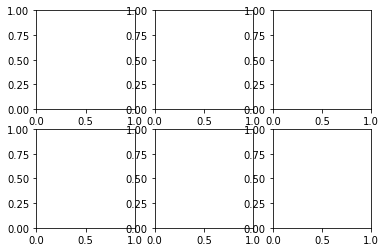

In [19]:
fig, axes = plt.subplots(2,3)

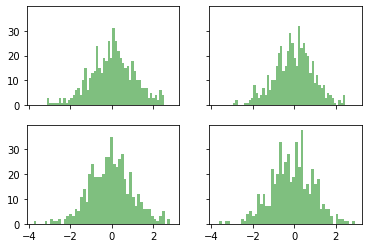

In [5]:
#adjusting the space around sub_plot
fig, axes=plt.subplots(2, 2, sharex=True, sharey=True) #是指有2*2個圖表
#subplot可以规划figure划分为n个子图，但每条subplot命令只会创建一个子图
#plt.subplot(行數, 列數, sharex(和誰共享x軸), sharey(和誰共享y軸),關鍵字字典,其他關鍵字)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='g', alpha=0.5)

plt.subplots_adjust(wspace=0.2, hspace=0.2) #圖表間間距: wspace=左右間距 hspace=上下間距

## Colors, Markers, and Line Styles

In [21]:
from numpy.random import randn

- one way of using the color and style

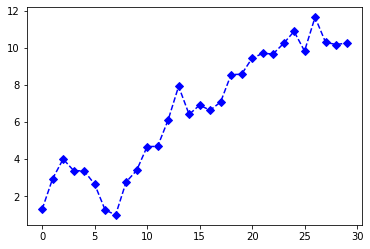

In [22]:
# way of using the color and style
fig=plt.figure()
plt.plot(randn(30).cumsum(), linestyle='--', color='b', marker='D')

- Another way of using the color and style

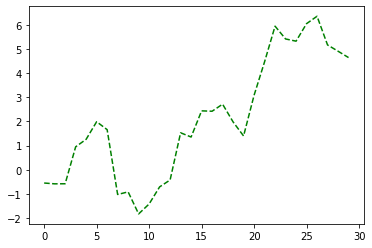

In [23]:
fig = plt.figure()
plt.plot(randn(30).cumsum(), linestyle = '--', color = 'g')

## Colors

In [ ]:
# Source https://matplotlib.org/stable/gallery/color/named_colors.html

In [34]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212 #單元寬度
    cell_height = 22
    swatch_width = 48 #樣本寬度
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi, facecolor='white')
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

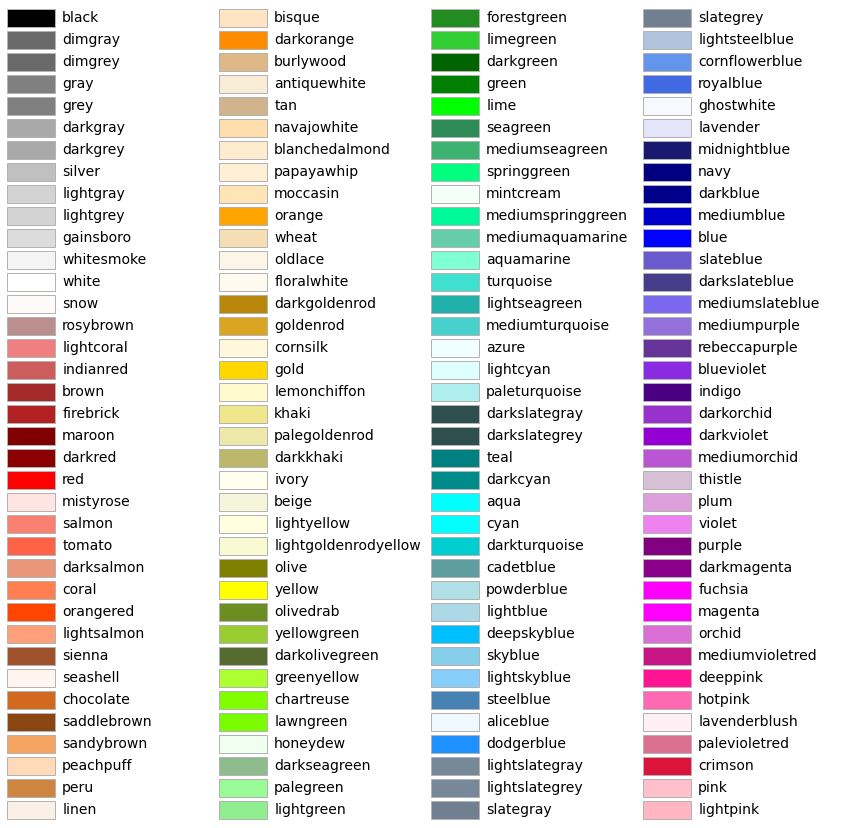

In [35]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [ ]:
#background color:https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/
#fig = plt.figure(facecolor='white') 分析圖背景色
#ax.set_facecolor("violet") 分析圖的顏色

# Setting the background color of the plot 
# using set_facecolor() method
#ax.set_facecolor("yellow")

## Markers

- Markers to highlight the actual datapoints 

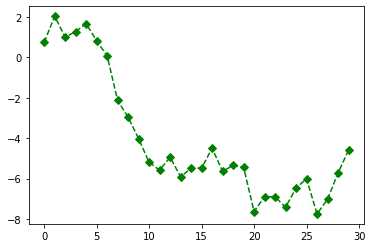

In [36]:
fig = plt.figure()
plt.plot(randn(30).cumsum(), color = 'green', linestyle = 'dashed', marker = 'D')

## Drawstyle option

- by default the points linearly interpolated(默認情況下，點線性插值)

In [6]:
data = np.random.randn(30).cumsum()

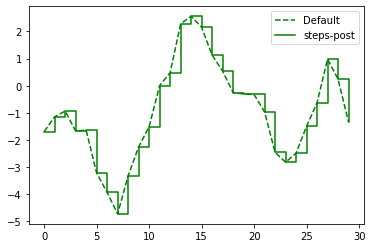

In [9]:
fig = plt.figure(facecolor='white')
plt.plot(data, 'g--', label='Default')
plt.plot(data, 'g-', drawstyle ='steps-post', label='steps-post')
# drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}
plt.legend(loc='best')
#legend(*args):顯示數據的名稱，名稱定義在label中，args為loc，主要是設定顯示的位置
# ex:leg = ax.legend(loc='upper right', shadow=True)
# loc->名稱放在圖表的右上角, frameon->名稱是否用框框, shadow->是否有陰影
#https://ithelp.ithome.com.tw/articles/10201670

        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============

        Markers

        =============   ===============================
        character       description
        =============   ===============================
        ``'.'``         point marker
        ``','``         pixel marker
        ``'o'``         circle marker
        ``'v'``         triangle_down marker
        ``'^'``         triangle_up marker
        ``'<'``         triangle_left marker
        ``'>'``         triangle_right marker
        ``'1'``         tri_down marker
        ``'2'``         tri_up marker
        ``'3'``         tri_left marker
        ``'4'``         tri_right marker
        ``'8'``         octagon marker
        ``'s'``         square marker
        ``'p'``         pentagon marker
        ``'P'``         plus (filled) marker
        ``'*'``         star marker
        ``'h'``         hexagon1 marker
        ``'H'``         hexagon2 marker
        ``'+'``         plus marker
        ``'x'``         x marker
        ``'X'``         x (filled) marker
        ``'D'``         diamond marker
        ``'d'``         thin_diamond marker
        ``'|'``         vline marker
        ``'_'``         hline marker
        =============   ===============================

        Line Styles

        =============    ===============================
        character        description
        =============    ===============================
        ``'-'``          solid line style
        ``'--'``         dashed line style
        ``'-.'``         dash-dot line style
        ``':'``          dotted line style
        =============    ===============================

        Example format strings::

            'b'    # blue markers with default shape
            'or'   # red circles
            '-g'   # green solid line
            '--'   # dashed line with default color
            '^k:'  # black triangle_up markers connected by a dotted line

        Colors

        The supported color abbreviations are the single letter codes

        =============    ===============================
        character        color
        =============    ===============================
        ``'b'``          blue
        ``'g'``          green
        ``'r'``          red
        ``'c'``          cyan
        ``'m'``          magenta
        ``'y'``          yellow
        ``'k'``          black
        ``'w'``          white
        =============    ===============================

## Ticks, Labels, and Legends

- For plot decoration we will be using pyplot interface which consist of `xlim` (consist of ax.get_xlim and ax.set_xlim) , `xticks`, `xticklabels`
- axes class has a set method that allows batch setting of plot properties.

In [23]:
data=np.random.randn(1000).cumsum()

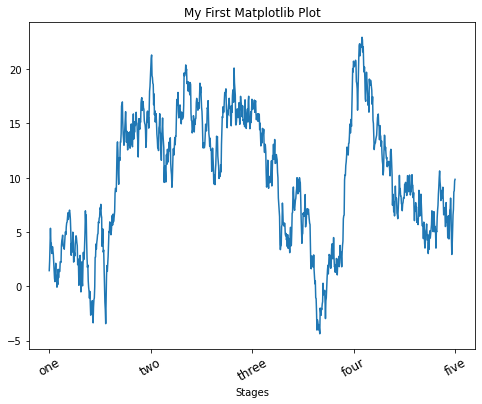

In [26]:
fig = plt.figure(figsize=(8, 6), facecolor="white") # Width, height in inches
ax = fig.add_subplot(1,1,1) # numpy array of figure object
ax.set_xticks([0,250,500,750,1000]) # locations on xaxis(设置刻度)
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], #可以将任何其他类型的值作为标签.可以赋值给之前已经设置过的set_xtick.
                   rotation=30,fontsize='large') # to label the xticks
#rotation: 30 :x軸標籤方向原來是水平的，現在轉動30度
ax.set_title('My First Matplotlib Plot')
ax.set_xlabel('Stages')
ax.plot(data)

## Adding legends

In [27]:
from numpy.random import randn

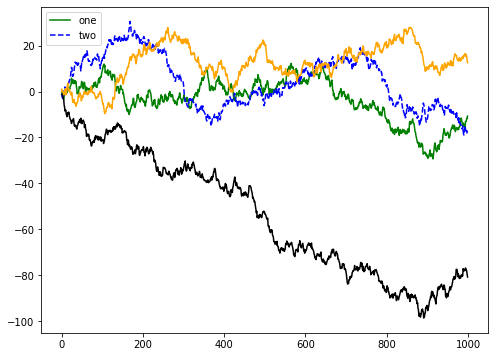

In [48]:
fig = plt.figure(figsize=(8,6), facecolor="white")
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'g', label='one')
ax.plot(randn(1000).cumsum(), 'b--', label='two')
ax.plot(randn(1000).cumsum(), 'k', label='_nolegend_') #k=balck
ax.plot(randn(1000).cumsum(), 'orange')
#ax.legend(loc='best')
ax.legend(loc='upper left')
#plt.legend()
#plt.
# 
#legend(*args):顯示數據的名稱，名稱定義在label中，args為loc，主要是設定顯示的位置

In [49]:
ax.legend?

Signature: ax.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `.Axes.legend` without
any arguments and without setting t

## Text and Annotations

In [65]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd


### Example: Effect of Holidays on US Births

### Load the data

In [64]:
births = pd.read_csv('births.csv')
births #???

FileNotFoundError: [Errno 2] No such file or directory: 'births.csv'

### Calculate the percentile of births

In [66]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

NameError: name 'births' is not defined

### Calculate mean and standard deviation

In [ ]:
# mu or μ or mean and sigma or σ 
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0]) # 0.74 is the multiplier of interquartile range
mu, sig

In [ ]:
type(births.day)

In [ ]:
plt.hist(births.births)

In [ ]:
# Normalize the data

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births
plt.hist(births.births)

In [ ]:
# Converting birth days into integer type

births['day'] = births['day'].astype(int)

In [ ]:
births['day']

In [ ]:
10000 * births.year + 100*births.month + births.day

In [ ]:
# Creating date as index
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births.index

In [ ]:
births.index.day

In [ ]:
# Aggregating the births by month and day using pivot table
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])

births_by_date

In [ ]:
births_by_date.index

In [ ]:
# Accessing the datetime of year 2012
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

births_by_date.index

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

#ax.text('2012-1-1', 3950, "New Year's Day", **style) # x, y positions followed by text
ax.text('2012-1-1', 3950, "New Year's Day")
#ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center')
#ax.text('2012-7-4', 4250, "Independence Day")
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

## Drawing Shapes

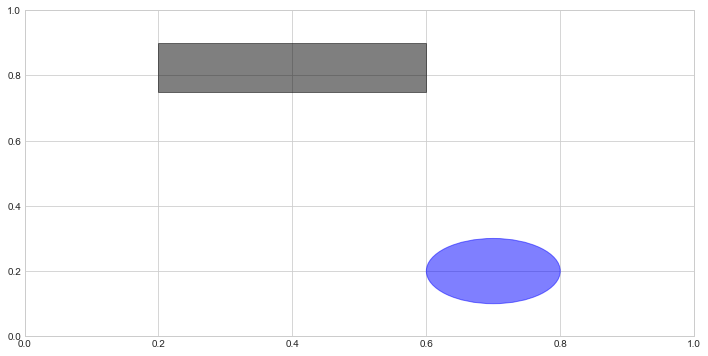

In [68]:
fig, ax = plt.subplots(figsize=(12,6))

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='black', alpha=0.5) #0.4 width; 0.15 height; 0.2 x-axis; 0.75 y-axis
ax.add_patch(rect)

circ = plt.Circle((0.7, 0.2), 0.10, color='blue', alpha=0.5) #(xy), radius
ax.add_patch(circ)

pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], #三個角的位置
                  color='green', alpha=0.7)
ax.add_patch(pgon) #生成圖片
plt.savefig('shapes.png', dpi=100, bbox_inches='tight') ## Save Plots to file

## Line Plot


- Series and DataFrame each have a plot attribute for making some basic plot types
- By default plot() makes line plots

### Series line plot

0    -0.325733
10    0.520849
20    1.885765
30    2.689523
40    2.527500
50    3.406296
60    1.648048
70    1.767851
80    1.412149
90    2.424132
dtype: float64


<AxesSubplot:>

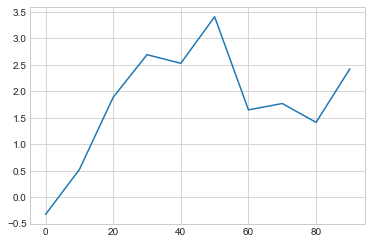

In [71]:
plt.figure(facecolor='white')
s=pd.Series(np.random.randn(10).cumsum(), index=np.arange(0 ,100, 10)) # Series plot
print(s)
s.plot()

### Dataframe line plot

           A         B         C         D
0   1.239929 -0.657420  0.428049 -1.574252
10  0.365376 -0.629252  0.840059 -0.910977
20  1.755210 -1.540246  1.447396 -1.072056
30  3.321944 -1.710421  1.690382 -2.430575
40  4.778426 -3.429509  3.202052 -3.031093
50  6.251231 -5.260894  3.410003 -3.241129
60  5.216093 -3.745024  3.327062 -2.876344
70  4.524178 -2.563896  2.740777 -2.895313
80  6.683690 -2.653641  2.284216 -0.994584
90  6.361776 -1.991524  3.717163 -0.076349


<AxesSubplot:>

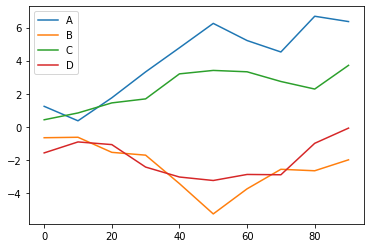

In [6]:
df=pd.DataFrame(np.random.randn(10, 4).cumsum(0), #10*4筆資料
                    columns=['A', 'B', 'C', 'D'], #category
                    index=np.arange(0, 100, 10)) #x-axis #start stop step in np.arange

print(df)
df.plot() #is equivalent to df.plot.line()

## Bar Plot
- Series Bar Plot
- DataFrame Bar Plot
- Stacked Bar Plot horizontal/vertical

<AxesSubplot:>

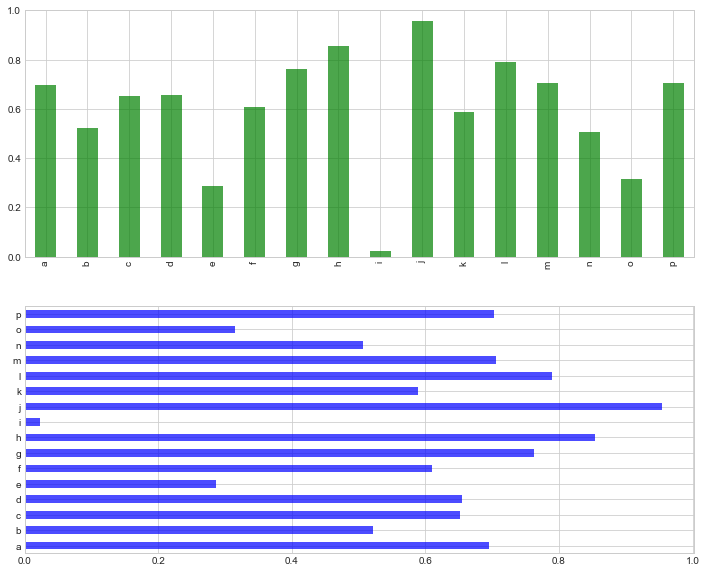

In [73]:
#Series Bar Plot
fig, axes=plt.subplots(2, 1, figsize=(12, 10), facecolor='white') #12为图形的宽， 10为图形的高，单位为英寸
data=pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))#Series bar plot
data.plot.bar(ax=axes[0], color='green', alpha=0.7) #ax=axes[0]的資料
#vertical bar , alpha is partial transparency on the filling

data.plot.barh(ax=axes[1], color='blue', alpha=0.7) #ax=axes[1]的資料 #horizontal bar


### DataFrame bar plot

Genus         A         B         C         D
one    0.289563  0.105534  0.643381  0.039095
two    0.704345  0.654180  0.268413  0.034176
three  0.413309  0.659526  0.147337  0.787088
four   0.304835  0.296751  0.077670  0.126435
five   0.281604  0.852485  0.575688  0.065231
six    0.093781  0.554806  0.424907  0.498795


<AxesSubplot:>

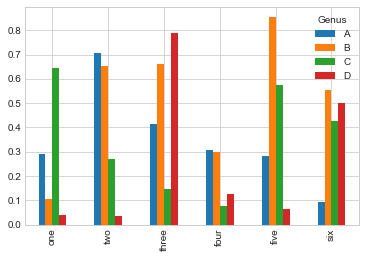

In [75]:
df = pd.DataFrame(np.random.rand(6,4), 
                  index=['one', 'two', 'three', 'four', 'five', 'six'], 
                 columns= pd.Index(['A', 'B', 'C', 'D'], name = 'Genus')) # name Genius is used to title the legend
print(df)
df.plot.bar()

### Stacked Bar Plot horizontal/vertical

<AxesSubplot:>

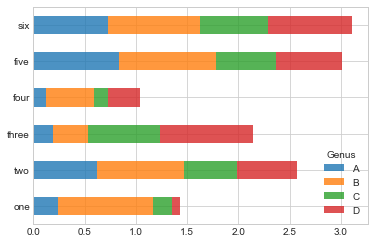

In [76]:
df = pd.DataFrame(np.random.rand(6,4), 
                  index=['one', 'two', 'three', 'four', 'five', 'six'], 
                 columns= pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))

df.plot.barh(stacked=True, alpha=0.8)

<AxesSubplot:>

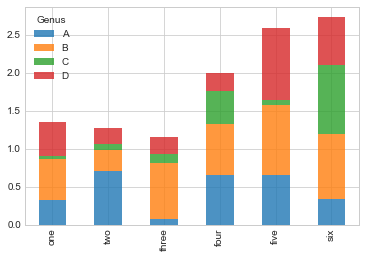

In [77]:
df = pd.DataFrame(np.random.rand(6,4), 
                  index=['one', 'two', 'three', 'four', 'five', 'six'], 
                 columns= pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))

df.plot.bar(stacked=True, alpha=0.8)

### Example: Restaurant Tipping

In [79]:
tips=pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [80]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [93]:
party_counts=pd.crosstab(tips['day'], tips['size'], margins = True) #交叉列表取值
#crosstab 第一个参数是列，第二个参数是行。还可以添加第三个参数 
#pd.crosstab(): https://learnku.com/articles/27452
#margins = True: 多了ALL那一行和列
party_counts


size,1,2,3,4,5,6,All
day,,,,,,,
Fri,1,16,1,1,0,0,19
Sat,2,53,18,13,1,0,87
Sun,0,39,15,18,3,1,76
Thur,1,48,4,5,1,3,62
All,4,156,38,37,5,4,244


In [84]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1
All,156,38,37,5


In [94]:
party_counts.sum(1) #1代表row sum, 0代表column sum

day
Fri      38
Sat     174
Sun     152
Thur    124
All     488
dtype: int64

size         1         2         3         4         5         6  All
day                                                                  
Fri   0.026316  0.421053  0.026316  0.026316  0.000000  0.000000  0.5
Sat   0.011494  0.304598  0.103448  0.074713  0.005747  0.000000  0.5
Sun   0.000000  0.256579  0.098684  0.118421  0.019737  0.006579  0.5
Thur  0.008065  0.387097  0.032258  0.040323  0.008065  0.024194  0.5
All   0.008197  0.319672  0.077869  0.075820  0.010246  0.008197  0.5


<AxesSubplot:xlabel='day'>

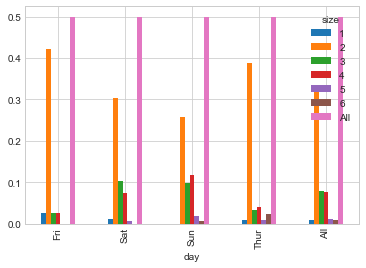

In [95]:
party_pcts = party_counts.div(party_counts.sum(1), axis='rows') 
#party_counts都被party_counts.sum(1)所除
# sum(1) across column wise: index (0), columns (1)
# div Get Floating division of dataframe 
#pandas.DataFrame.div():https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html
print(party_pcts)
party_pcts.plot.bar()

### Example: Tipping Percentage by Day with Seaborn

In [96]:
import seaborn as sns

In [97]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [99]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

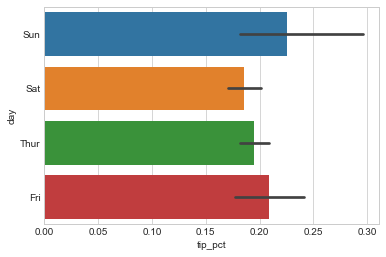

In [100]:
# bars are the average of tips_pct as multiple observations of each value in a single day
# black lines represent 95% confidence interval
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') 

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

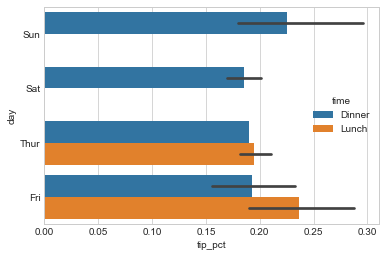

In [102]:
# hue enables the split by an additional categorical value(hue 允許按額外的分類值進行拆分)
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h') 

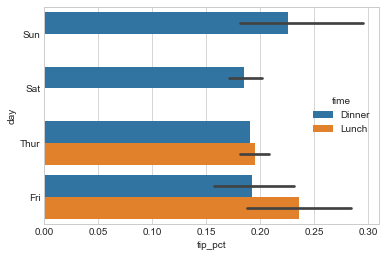

In [103]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h') 
sns.set(style='whitegrid')

## Histograms and Density Plots

In [104]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


### Histogram plot

- Histogram is a kind of bar plot that gives discretized display of value frequency.

<AxesSubplot:ylabel='Frequency'>

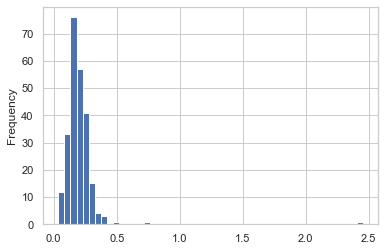

In [105]:
tips['tip_pct'].plot.hist(bins=50)
# The towers or bars of a histogram are called bins. 
# The height of each bin shows how many values from that data fall into that range.

In [106]:
tips['tip_pct'].min()

0.03695514845230575

In [107]:
tips['tip_pct'].max()

2.452380952380953

### Density plot of tip percentage

- Density plot is formed by computing an estimate of a continuous probability distribution 
- Density plots are also known as kernel density mixture

<AxesSubplot:ylabel='Density'>

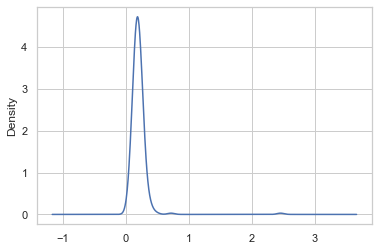

In [108]:
tips['tip_pct'].plot.density() 

### Seaborn: Example of histogram and density plot

In [109]:
comp1 = np.random.normal(0,1, size=200) #creating random arrays using normal distribution..where the values have
                                        # mean=0, std deviation=1 and size
comp2 = np.random.normal(10, 2, size=200) #mean =10, and standard deviation =2
comp3 = np.random.normal(10,2, size=10)
comp3

array([11.31355551,  6.86015612,  7.52248719, 12.15518501, 11.45458481,
        9.63520721, 14.00153535,  9.22842459, 11.97570568,  6.54236833])

C:\Users\hsian\AppData\Local\Temp\ipykernel_26996\4259229764.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=100, color='k') # deprecated


<AxesSubplot:ylabel='Density'>

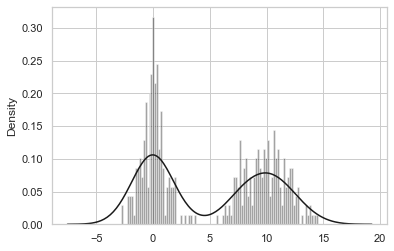

In [110]:
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values, bins=100, color='k') # deprecated(已被棄用)

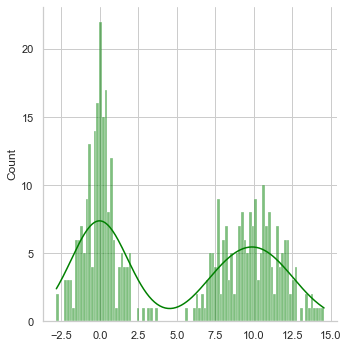

In [113]:
sns.displot(values, bins=100, color='green', kde = True) #kde is creating density plot(密度圖)
#sns.distplot(): https://zhuanlan.zhihu.com/p/33977558

- Other way of creating histogram and density plot is by using sns.histogram

<AxesSubplot:ylabel='Count'>

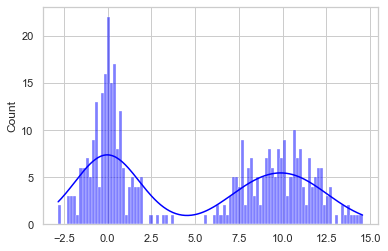

In [112]:
sns.histplot(values, bins=100, color='blue', kde=True)

## Scatter or Point Plot

In [114]:
macro = pd.read_csv('macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
# cpi       - End of the quarter consumer price index for all urban 
#             consumers: all items (1982-84 = 100, seasonally adjusted).
# m1        - End of the quarter M1 nominal money stock (Seasonally adjusted)
# tbilrate  - Quarterly monthly average of the monthly 3-month treasury bill: secondary market rate
# unemp     - Seasonally adjusted unemployment rate (%)

In [115]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


- Calculating percentage change

In [116]:
# An alternative to using percent change is “log differences”. 
# In this method, the logarithm of one 
#   quantity is subtracted from the logarithm of another quantity. 
#(在這種方法中，一個量的對數是從另一個量的對數中減去的。)
# The advantage of measuring change in this way is that the calculations are symmetrical 
#   going forward and backward.
#(以這種方式衡量變化的優點是計算向前和向後是對稱的。)
#np.log():自然對數
#pd.diff():计算DataFrame元素与DataFrame中另一个元素的差异（默认值是前一行的同一列中的元素）
#           (https://www.cjavapy.com/article/388/)
#df.diff():比較與前一column的差異
#df.diff(axis=1):比較與前一row的差異
trans_data = np.log(data).diff().dropna() 
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


### Scatter plot and fits the regression line

- Scatter plot or point plot is a useful way of examining the relationship between two one-dimensional data seires
- We loaded macrodata, selected few variables and then compute the log difference
- We use seaborn's regplot method, which makes a scatter plot and fits a linear regression line

<AxesSubplot:xlabel='m1', ylabel='unemp'>

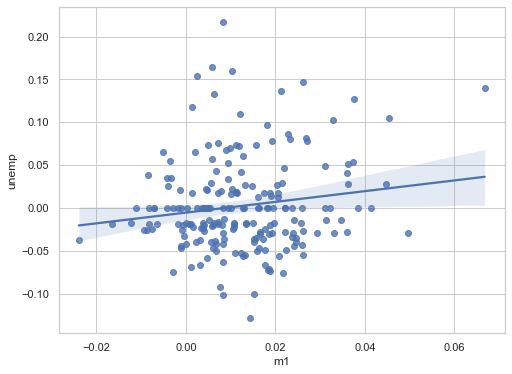

In [117]:
fig, ax = plt.subplots(figsize=(8,6)) #figure size adjusted as per requirement
sns.regplot(x='m1', y='unemp', data=trans_data, ax=ax) #Scatter plot and fits the regression line

# m1: quarter M1 nominal money stock 
# y: unemployement rate%
#sns.regplot():繪製數據和線性回歸模型擬合

### Pair plot or Scatter plot matrix

- In exploratory data analysis it is helpful to look at all scatter plots among a group of variables
- This is known as pair plot or scatter plot matrix
- We use seaborn's pairplot function which place histogram or density estimates of each variable along the diagonal

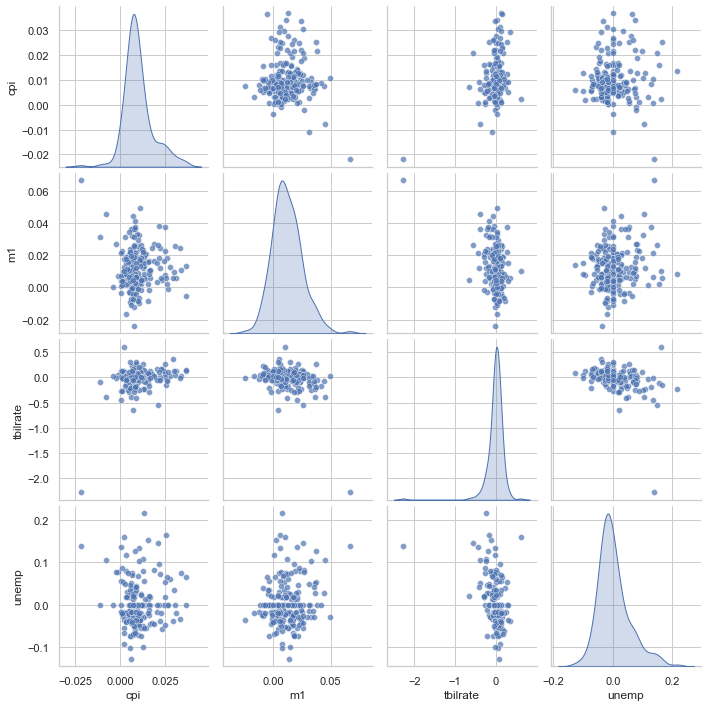

In [119]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.7}) #kernel density estimate (KDE)
# kind : {'scatter', 'kde', 'hist', 'reg'}
# diag_kind : {'auto', 'hist', 'kde', None}


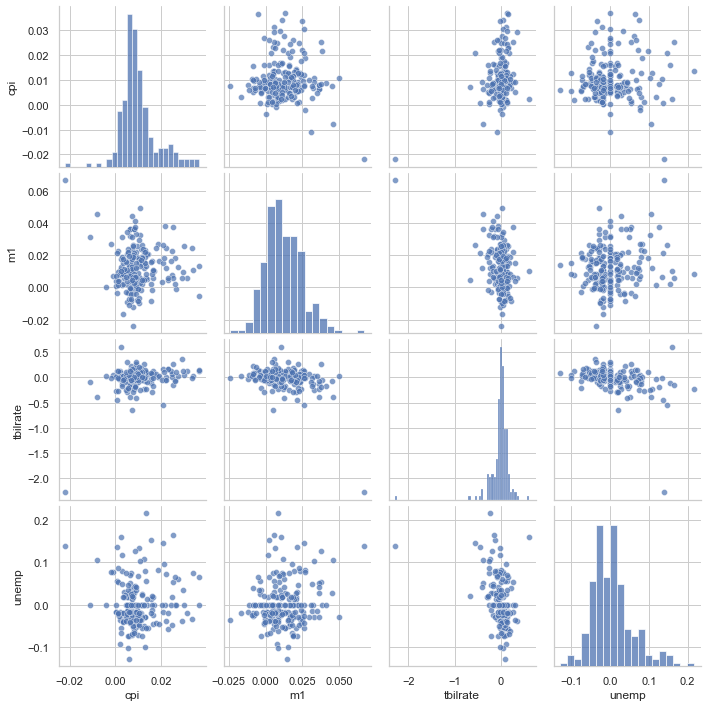

In [120]:
sns.pairplot(trans_data, diag_kind='hist', plot_kws={'alpha':0.7}) #kind histogram
# kind : {'scatter', 'kde', 'hist', 'reg'}
# diag_kind : {'auto', 'hist', 'kde', None}
# When a number is a fraction (less than one), then the log is always negative.

## Facet Grids and Categorical Data

- What if we have additional grouping dimensions?
- To visualize many categorical variables is to use a facet grid
- Seaborn's factorplot provide such functions to plot faceted plots

In [121]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

# UserWarning: The `factorplot` function has been renamed to `catplot`.

AttributeError: module 'seaborn' has no attribute 'factorplot'

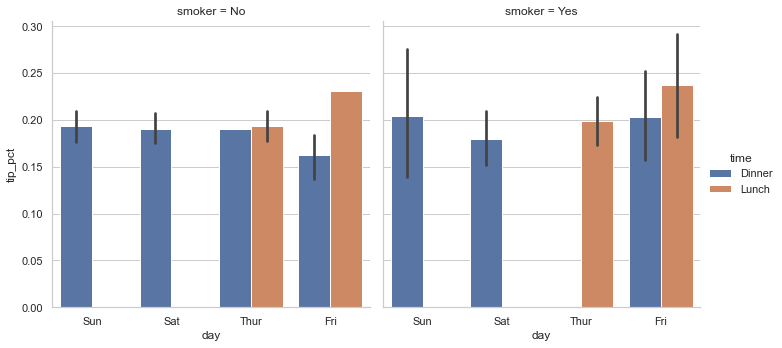

In [122]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

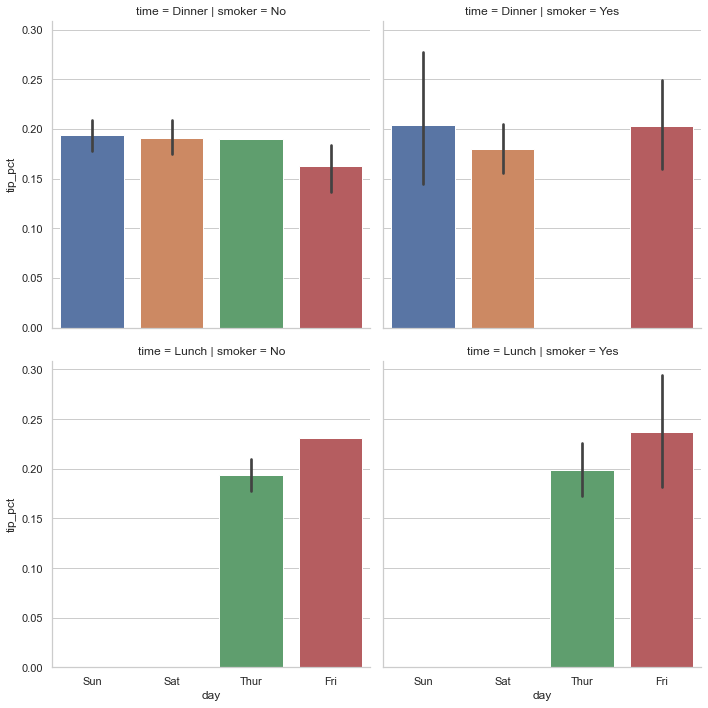

In [123]:
# Expanding the facet grid by adding one row per time value

sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

## Box plot

- What if we want to visualize median, quartiles, and outliers
- Box plot can be an effective way to visualize such type of data

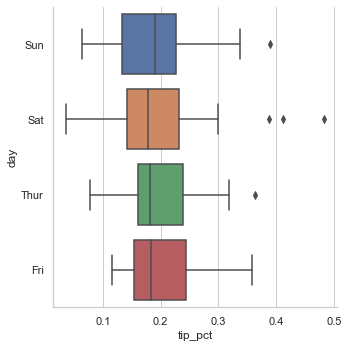

In [124]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct<0.5])

In [125]:
tips[tips['tip_pct']>=0.5]

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381
178,9.60,4.00,Yes,Sun,Dinner,2,0.714286
